In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
weather = pd.read_csv('features_csv/salvador_features.csv').set_index('Date')
weather.head()

,Sal_temp,Sal_max,Sal_min,Sal_dwp,Sal_mx_dwp,Sal_mi_dwp,Sal_pressure,Sal_humidity,Sal_wind,Sal_clouds,...,Sal_pressure_3,Sal_humidity_1,Sal_humidity_2,Sal_humidity_3,Sal_wind_1,Sal_wind_2,Sal_wind_3,Sal_clouds_1,Sal_clouds_2,Sal_clouds_3
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,27.416667,27.416667,27.416667,21.591667,21.591667,21.591667,1013.916667,70.875000,5.291667,24.166667,...,1015.333333,71.875000,74.041667,76.125000,4.208333,4.000000,4.083333,26.666667,25.833333,40.000000
2017-01-05,27.666667,27.666667,27.666667,24.266667,24.266667,24.266667,1014.958333,83.000000,5.041667,37.500000,...,1012.916667,70.875000,71.875000,74.041667,5.291667,4.208333,4.000000,24.166667,26.666667,25.833333
2017-01-06,27.250000,27.250000,27.250000,20.766667,20.766667,20.766667,1015.000000,67.583333,3.833333,30.833333,...,1012.333333,83.000000,70.875000,71.875000,5.041667,5.291667,4.208333,37.500000,24.166667,26.666667
2017-01-07,26.875000,26.875000,26.875000,20.500000,20.500000,20.500000,1014.291667,68.125000,3.166667,38.333333,...,1013.916667,67.583333,83.000000,70.875000,3.833333,5.041667,5.291667,30.833333,37.500000,24.166667
2017-01-08,27.125000,27.125000,27.125000,20.575000,20.575000,20.575000,1013.666667,67.250000,4.125000,28.125000,...,1014.958333,68.125000,67.583333,83.000000,3.166667,3.833333,5.041667,38.333333,30.833333,37.500000


In [7]:
weather.corr()[['Sal_temp']].sort_values('Sal_temp')  

,Sal_temp
Sal_pressure,-0.593776
Sal_pressure_1,-0.566891
Sal_pressure_2,-0.549522
Sal_pressure_3,-0.530351
Sal_clouds,-0.409132
Sal_clouds_1,-0.367273
Sal_clouds_2,-0.318709
Sal_clouds_3,-0.275227
Sal_humidity,-0.228831
Sal_wind_2,-0.161940


In [8]:
# remove features that have very low Correlation values
# also remove max and min temperatures since we already 
# have the mean temperatures
# set X and y values
predictors = ['Sal_temp_1','Sal_temp_2', 'Sal_temp_3', 
              'Sal_max_1', 'Sal_max_2', 'Sal_max_3',
              'Sal_min_1', 'Sal_min_2', 'Sal_min_3',
              'Sal_dwp_1', 'Sal_dwp_2','Sal_dwp_3', 
              'Sal_mx_dwp_1', 'Sal_mx_dwp_2', 'Sal_mx_dwp_3',
              'Sal_mi_dwp_1', 'Sal_mi_dwp_2', 'Sal_mi_dwp_3']


weather_2 = weather[['Sal_temp'] + predictors]

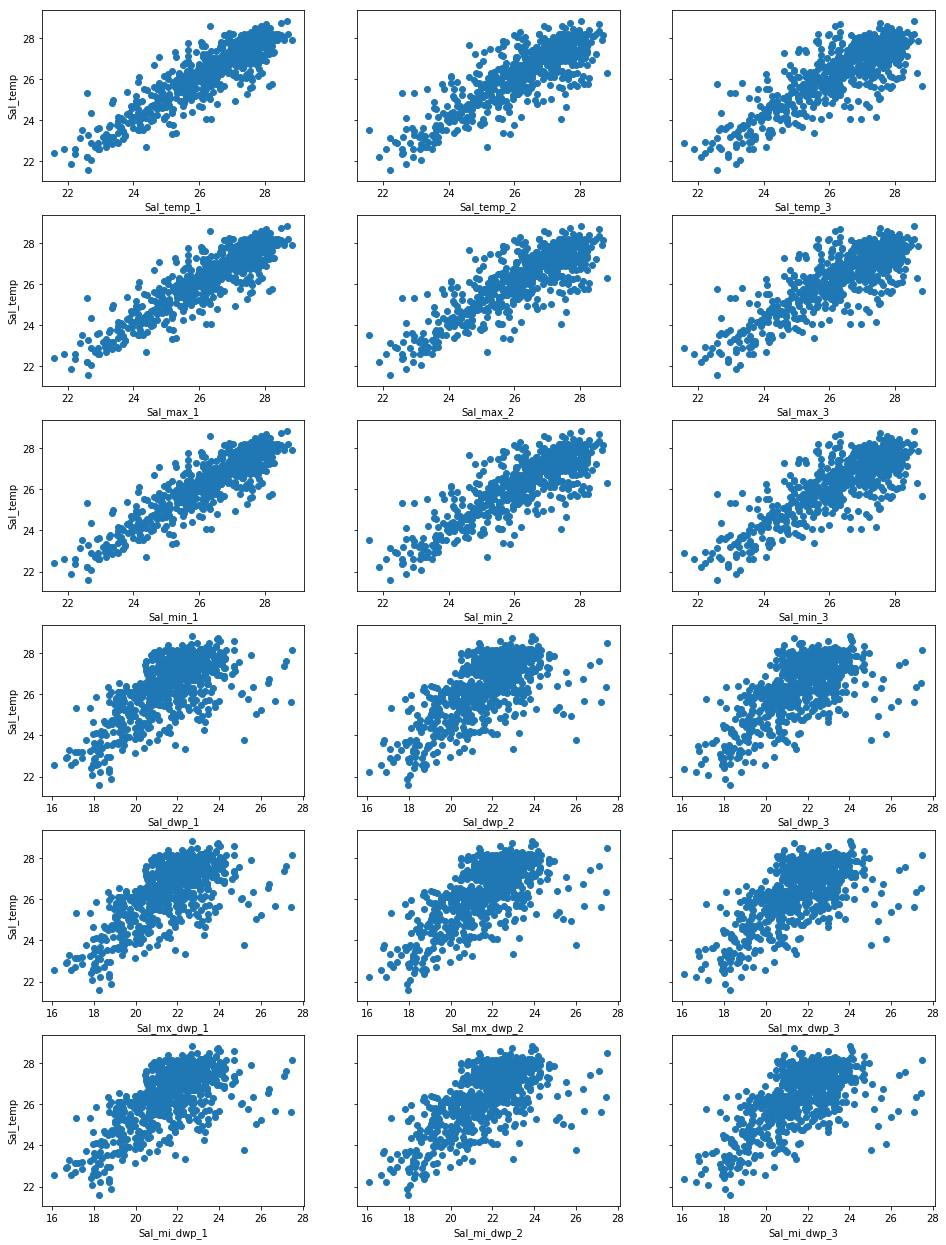

In [10]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(weather_2[feature], weather_2['Sal_temp'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='Sal_temp')
        else:
            axes[row, col].set(xlabel=feature)
plt.show() 

In [11]:
# set X and y values
X = weather_2[predictors]  
y = weather_2['Sal_temp']

In [12]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Sal_temp_1,Sal_temp_2,Sal_temp_3,Sal_max_1,Sal_max_2,Sal_max_3,Sal_min_1,Sal_min_2,Sal_min_3,Sal_dwp_1,Sal_dwp_2,Sal_dwp_3,Sal_mx_dwp_1,Sal_mx_dwp_2,Sal_mx_dwp_3,Sal_mi_dwp_1,Sal_mi_dwp_2,Sal_mi_dwp_3
Date,,,,,,,,,,,,,,,,,,
2018-08-30,25.750000,25.291667,25.083333,25.750000,25.291667,25.083333,25.750000,25.291667,25.083333,20.100000,22.091667,21.616667,20.100000,22.091667,21.616667,20.100000,22.091667,21.616667
2017-01-22,27.791667,27.708333,27.750000,27.791667,27.708333,27.750000,27.791667,27.708333,27.750000,21.100000,20.808333,21.141667,21.100000,20.808333,21.141667,21.100000,20.808333,21.141667
2017-12-12,25.708333,24.916667,27.083333,25.708333,24.916667,27.083333,25.708333,24.916667,27.083333,22.691667,22.916667,23.183333,22.691667,22.916667,23.183333,22.691667,22.916667,23.183333
2018-01-08,27.625000,27.291667,27.291667,27.625000,27.291667,27.291667,27.625000,27.291667,27.291667,22.566667,22.900000,22.983333,22.566667,22.900000,22.983333,22.566667,22.900000,22.983333
2018-11-29,25.083333,25.291667,25.583333,25.083333,25.291667,25.583333,25.083333,25.291667,25.583333,22.575000,22.075000,23.466667,22.575000,22.075000,23.466667,22.575000,22.075000,23.466667


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
# define the model
model = LinearRegression()

# traub the model/ fit the model to the traingin data
model.fit(X_train, y_train)

# predict
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [40]:
import pickle

In [41]:
# save model
with open('linear_temp_south.pkl', 'wb') as file:
    pickle.dump(model, file)

In [42]:
pd.DataFrame({"True Temperatures": y_train, "Predicted Temperatures": y_train_prediction}).head()

,True Temperatures,Predicted Temperatures
Date,,
2018-08-30,26.125000,25.486606
2017-01-22,28.000000,27.566564
2017-12-12,26.666667,26.111468
2018-01-08,27.000000,27.476503
2018-11-29,25.250000,25.517809


In [43]:
# use evaluation metrics to determine model performance
r2_train = r2_score(y_train, y_train_prediction)
r2_test = r2_score(y_test, y_test_prediction)
print("The R^2 score for training data is:", r2_train)
print("The R^2 score for test data is:", r2_test)

The R^2 score for training data is: 0.8276129189705776
The R^2 score for test data is: 0.810829661979277


In [44]:
# calculate the RMSE
RSME_train = mean_squared_error(y_train, y_train_prediction)**0.5
RSME_test = mean_squared_error(y_test, y_test_prediction)**0.5

print("The RSME for training data is:", RSME_train)
print("The RSME for test data is:", RSME_test)

The RSME for training data is: 0.5716905567011867
The RSME for test data is: 0.6784389285199688


In [47]:
# open model
with open('linear_temp_north.pkl', 'rb') as file:
    model = pickle.load(file)

In [48]:
manly_test = pd.read_csv('features_csv/manly_features.csv').set_index('Date')
manly_test.columns

Index(['Man_temp', 'Man_max', 'Man_min', 'Man_dwp', 'Man_mx_dwp', 'Man_mi_dwp',
       'Man_pressure', 'Man_humidity', 'Man_wind', 'Man_clouds', 'Man_temp_1',
       'Man_temp_2', 'Man_temp_3', 'Man_max_1', 'Man_max_2', 'Man_max_3',
       'Man_min_1', 'Man_min_2', 'Man_min_3', 'Man_dwp_1', 'Man_dwp_2',
       'Man_dwp_3', 'Man_mx_dwp_1', 'Man_mx_dwp_2', 'Man_mx_dwp_3',
       'Man_mi_dwp_1', 'Man_mi_dwp_2', 'Man_mi_dwp_3'],
      dtype='object')

In [49]:
predictors_man = ['Man_temp_1','Man_temp_2', 'Man_temp_3', 
                  'Man_max_1', 'Man_max_2', 'Man_max_3',
                  'Man_min_1', 'Man_min_2', 'Man_min_3', 
                  'Man_dwp_1', 'Man_dwp_2','Man_dwp_3', 
                  'Man_mx_dwp_1', 'Man_mx_dwp_2', 'Man_mx_dwp_3',
                  'Man_mi_dwp_1', 'Man_mi_dwp_2', 'Man_mi_dwp_3']
X = manly_test[predictors_man]  
y = manly_test['Man_temp']

In [50]:
model.score(X,y)

0.7706250304611232

In [51]:
model.predict(X)

array([22.30452338, 22.04610686, 22.41947371, 22.23721453, 23.73359044,
       24.72732853, 25.01525277, 27.13437684, 26.39383918, 25.34338366,
       28.15968578, 24.98844789, 24.66201026, 25.35711606, 29.9732857 ,
       23.0369091 , 24.16627979, 24.26066265, 21.68300302, 24.26546213,
       26.59837086, 24.9412315 , 22.60936936, 22.59933806, 23.53316033,
       25.71013009, 24.8674551 , 28.40731441, 24.08734119, 23.77135626,
       23.17981948, 25.05169545, 27.52968689, 29.46146058, 25.72153714,
       24.22571267, 24.72048049, 26.19616393, 28.49520838, 28.37262718,
       22.86036795, 23.66201981, 21.11153895, 22.36486312, 24.14306836,
       24.44797179, 23.77051912, 20.73932909, 20.33468959, 22.80364743,
       24.06604498, 24.5856527 , 22.64555284, 21.06548792, 21.82241432,
       22.6688293 , 23.56395492, 22.6432326 , 23.37513083, 22.6952524 ,
       21.91787681, 21.94450954, 21.37917937, 20.32613307, 20.80424958,
       20.82604296, 20.5011665 , 21.16448827, 24.0066797 , 24.08